In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # or the full path to the "project" directory
import numpy as np
import gpbr

In [2]:
T = 2 # final time
N = 9 # N+1=10 time points
# M = 64 # number of collocation points
# M = 16 # number of collocation points
M = 16 # number of collocation points

In [3]:
tn = np.array([(n+1)*(T/(N+1)) for n in range(0, N+1)])
h = T/(N+1)

In [4]:
h

0.2

In [5]:
tn

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [6]:
nu = np.sqrt(2/h)
nu

np.float64(3.1622776601683795)

In [7]:
betta_array = []
for n in range(0, N+1):
    sign = (-1)**n
    betta_array.append(sign*(4/h))
betta_array[0] = np.nan
betta_array

[nan, -20.0, 20.0, -20.0, 20.0, -20.0, 20.0, -20.0, 20.0, -20.0]

In [8]:
from gpbr.direct.heat_equation.common import MFSData
mfs_data =MFSData(N, T, tn, M, betta_array, nu)

In [9]:
from gpbr.direct.common.collocation import collocation_points_2d, CollocationData2D
coll_2d = collocation_points_2d(M, startpoint=False)
coll_2d

CollocationData2D(n=16, theta=array([0.39269908, 0.78539816, 1.17809725, 1.57079633, 1.96349541,
       2.35619449, 2.74889357, 3.14159265, 3.53429174, 3.92699082,
       4.3196899 , 4.71238898, 5.10508806, 5.49778714, 5.89048623,
       6.28318531]))

In [10]:
from gpbr.direct.common.boundary import StarlikeCurve, starlike_circle_base, starlike_curve
point_circle = starlike_circle_base(coll_2d)

Gamma1 = point_circle*0.5
Gamma2 = point_circle*1.5

In [11]:
from gpbr.direct.common.source import SourcePoints2D, source_points_2d
source_coll_2d = collocation_points_2d(M//2, startpoint=False)
source_point_circle = starlike_circle_base(source_coll_2d)
eta1 = 0.5
eta2 = 2.0


Gamma1_source = source_point_circle*0.5
Gamma2_source = source_point_circle*1.5

source_points = source_points_2d(eta1, eta2, Gamma1_source, Gamma2_source)

In [12]:
## Plot
import matplotlib.pyplot as plt
def plot_2d(G1: StarlikeCurve, G2: StarlikeCurve, artG1: StarlikeCurve, artG2: StarlikeCurve):
    fig_plot, ax_plot = plt.subplots()
    g1_x, g1_y = G1.raw_points()
    g2_x, g2_y = G2.raw_points()
    art1_x, art1_y = artG1.raw_points()
    art2_x, art2_y = artG2.raw_points()
    ax_plot.plot(g1_x, g1_y, 'b--')
    ax_plot.plot(g2_x, g2_y, 'r--')
    ax_plot.plot(art1_x, art1_y, 'bo')
    ax_plot.plot(art2_x, art2_y, 'ro')

    ax_plot.axis('equal')
    plt.grid()
    plt.show()
    plt.close()


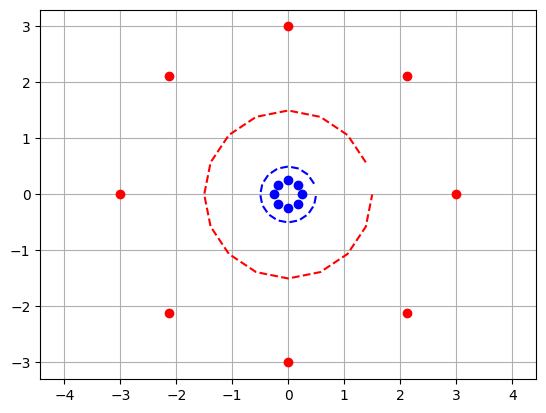

In [13]:
plot_2d(Gamma1, Gamma2, source_points.gart1, source_points.gart2)

In [14]:
from gpbr.direct.common.boundary import Point2D, Point3D
def f1(x: Point2D | Point3D , t):
    return 0

def f2(x: Point2D , t: float) -> np.array:
    return (t**2)*np.exp(-4*t+2)*np.sqrt(x.x**2 + x.y**2)

Manual tests

In [15]:
yj = [source_points[i] for i in range(0, M)]
yj

[Point2D(x=np.float64(2.121320343559643), y=np.float64(2.1213203435596424)),
 Point2D(x=np.float64(1.8369701987210297e-16), y=np.float64(3.0)),
 Point2D(x=np.float64(-2.1213203435596424), y=np.float64(2.121320343559643)),
 Point2D(x=np.float64(-3.0), y=np.float64(3.6739403974420594e-16)),
 Point2D(x=np.float64(-2.121320343559643), y=np.float64(-2.1213203435596424)),
 Point2D(x=np.float64(-5.51091059616309e-16), y=np.float64(-3.0)),
 Point2D(x=np.float64(2.121320343559642), y=np.float64(-2.121320343559643)),
 Point2D(x=np.float64(3.0), y=np.float64(-7.347880794884119e-16)),
 Point2D(x=np.float64(0.1767766952966369), y=np.float64(0.17677669529663687)),
 Point2D(x=np.float64(1.5308084989341915e-17), y=np.float64(0.25)),
 Point2D(x=np.float64(-0.17677669529663687), y=np.float64(0.1767766952966369)),
 Point2D(x=np.float64(-0.25), y=np.float64(3.061616997868383e-17)),
 Point2D(x=np.float64(-0.17677669529663692), y=np.float64(-0.17677669529663687)),
 Point2D(x=np.float64(-4.592425496802574e-1

In [16]:
from scipy.special import k0
PHI0_MATRIX_G1 = np.zeros((M, M))
vals = []
for xx in Gamma1.points:
    for yy in yj:
        # vals.append(np.sqrt((xx.x-yy.x)**2 + (xx.y-yy.y)**2))
        print(xx, yy, nu*np.sqrt((xx.x-yy.x)**2 + (xx.y-yy.y)**2))
        print(xx, yy, k0(nu*np.sqrt((xx.x-yy.x)**2 + (xx.y-yy.y)**2)))
        print("\n")
        # print(xx, yy, np.sqrt((xx.x-yy.x)**2 + (xx.y-yy.y)**2))


Point2D(x=np.float64(0.4619397662556433), y=np.float64(0.19134171618254509)) Point2D(x=np.float64(2.121320343559643), y=np.float64(2.1213203435596424)) 8.048826872573505
Point2D(x=np.float64(0.4619397662556433), y=np.float64(0.19134171618254509)) Point2D(x=np.float64(2.121320343559643), y=np.float64(2.1213203435596424)) 0.0001390788425937899


Point2D(x=np.float64(0.4619397662556433), y=np.float64(0.19134171618254509)) Point2D(x=np.float64(1.8369701987210297e-16), y=np.float64(3.0)) 9.001083103107497
Point2D(x=np.float64(0.4619397662556433), y=np.float64(0.19134171618254509)) Point2D(x=np.float64(1.8369701987210297e-16), y=np.float64(3.0)) 5.082325186493773e-05


Point2D(x=np.float64(0.4619397662556433), y=np.float64(0.19134171618254509)) Point2D(x=np.float64(-2.1213203435596424), y=np.float64(2.121320343559643)) 10.197083061883564
Point2D(x=np.float64(0.4619397662556433), y=np.float64(0.19134171618254509)) Point2D(x=np.float64(-2.1213203435596424), y=np.float64(2.121320343559643)) 1.4

In [17]:
nu

np.float64(3.1622776601683795)

In [18]:
from scipy.special import k0
PHI0_MATRIX_G1 = np.zeros((M, M))
for xx in Gamma1.points:
    for yy in yj:
        PHI0_MATRIX_G1[Gamma1.points.index(xx), yj.index(yy)] = k0(nu*np.sqrt((xx.x-yy.x)**2 + (xx.y-yy.y)**2))
        # print(xx, yy, k0(nu*np.sqrt((xx.x-yy.x)**2 + (xx.y-yy.y)**2)))
PHI0_MATRIX_G1

array([[1.39078843e-04, 5.08232519e-05, 1.44610254e-05, 6.48006856e-06,
        6.48006856e-06, 1.44610254e-05, 5.08232519e-05, 1.39078843e-04,
        4.84629024e-01, 2.21583394e-01, 1.11088851e-01, 7.62302508e-02,
        7.62302508e-02, 1.11088851e-01, 2.21583394e-01, 4.84629024e-01],
       [1.61886227e-04, 9.16020027e-05, 2.65604475e-05, 8.87309086e-06,
        5.81520719e-06, 8.87309086e-06, 2.65604475e-05, 9.16020027e-05,
        5.73547853e-01, 3.34143799e-01, 1.51948546e-01, 8.79883994e-02,
        7.26286694e-02, 8.79883994e-02, 1.51948546e-01, 3.34143799e-01],
       [1.39078843e-04, 1.39078843e-04, 5.08232519e-05, 1.44610254e-05,
        6.48006856e-06, 6.48006856e-06, 1.44610254e-05, 5.08232519e-05,
        4.84629024e-01, 4.84629024e-01, 2.21583394e-01, 1.11088851e-01,
        7.62302508e-02, 7.62302508e-02, 1.11088851e-01, 2.21583394e-01],
       [9.16020027e-05, 1.61886227e-04, 9.16020027e-05, 2.65604475e-05,
        8.87309086e-06, 5.81520719e-06, 8.87309086e-06, 2.656

In [19]:
from scipy.special import k0
PHI0_MATRIX_G2 = np.zeros((M, M))
for xx in Gamma2.points:
    for yy in yj:
        PHI0_MATRIX_G2[Gamma2.points.index(xx), yj.index(yy)] = k0(nu*np.sqrt((xx.x-yy.x)**2 + (xx.y-yy.y)**2))
        # print(xx, yy, k0(nu*np.sqrt((xx.x-yy.x)**2 + (xx.y-yy.y)**2)))
PHI0_MATRIX_G2

array([[2.33919913e-03, 6.05480579e-05, 1.93853189e-06, 2.79743615e-07,
        2.79743615e-07, 1.93853189e-06, 6.05480579e-05, 2.33919913e-03,
        1.08591262e-02, 6.39602526e-03, 3.31359296e-03, 2.18060313e-03,
        2.18060313e-03, 3.31359296e-03, 6.39602526e-03, 1.08591262e-02],
       [4.89252946e-03, 4.29352626e-04, 9.41858182e-06, 5.87214055e-07,
        2.17593113e-07, 5.87214055e-07, 9.41858182e-06, 4.29352626e-04,
        1.17644837e-02, 8.71563713e-03, 4.55274848e-03, 2.56843743e-03,
        2.06113276e-03, 2.56843743e-03, 4.55274848e-03, 8.71563713e-03],
       [2.33919913e-03, 2.33919913e-03, 6.05480579e-05, 1.93853189e-06,
        2.79743615e-07, 2.79743615e-07, 1.93853189e-06, 6.05480579e-05,
        1.08591262e-02, 1.08591262e-02, 6.39602526e-03, 3.31359296e-03,
        2.18060313e-03, 2.18060313e-03, 3.31359296e-03, 6.39602526e-03],
       [4.29352626e-04, 4.89252946e-03, 4.29352626e-04, 9.41858182e-06,
        5.87214055e-07, 2.17593113e-07, 5.87214055e-07, 9.418

In [20]:
PHI_MATRIX_TEST = np.concatenate((PHI0_MATRIX_G1, PHI0_MATRIX_G2), axis=0)
PHI_MATRIX_TEST

array([[1.39078843e-04, 5.08232519e-05, 1.44610254e-05, 6.48006856e-06,
        6.48006856e-06, 1.44610254e-05, 5.08232519e-05, 1.39078843e-04,
        4.84629024e-01, 2.21583394e-01, 1.11088851e-01, 7.62302508e-02,
        7.62302508e-02, 1.11088851e-01, 2.21583394e-01, 4.84629024e-01],
       [1.61886227e-04, 9.16020027e-05, 2.65604475e-05, 8.87309086e-06,
        5.81520719e-06, 8.87309086e-06, 2.65604475e-05, 9.16020027e-05,
        5.73547853e-01, 3.34143799e-01, 1.51948546e-01, 8.79883994e-02,
        7.26286694e-02, 8.79883994e-02, 1.51948546e-01, 3.34143799e-01],
       [1.39078843e-04, 1.39078843e-04, 5.08232519e-05, 1.44610254e-05,
        6.48006856e-06, 6.48006856e-06, 1.44610254e-05, 5.08232519e-05,
        4.84629024e-01, 4.84629024e-01, 2.21583394e-01, 1.11088851e-01,
        7.62302508e-02, 7.62302508e-02, 1.11088851e-01, 2.21583394e-01],
       [9.16020027e-05, 1.61886227e-04, 9.16020027e-05, 2.65604475e-05,
        8.87309086e-06, 5.81520719e-06, 8.87309086e-06, 2.656

In [21]:
RIGHT_SIDE_G1 = np.zeros(M)
for xx in Gamma1.points:
    RIGHT_SIDE_G1[Gamma1.points.index(xx)] = 0

In [22]:
RIGHT_SIDE_G2 = np.zeros(M)
for xx in Gamma2.points:
    RIGHT_SIDE_G2[Gamma2.points.index(xx)] = f2(xx, 0.2)

In [23]:
RIGHT_SIDE = np.concatenate((RIGHT_SIDE_G1, RIGHT_SIDE_G2), axis=0)
RIGHT_SIDE

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19920702, 0.19920702, 0.19920702, 0.19920702,
       0.19920702, 0.19920702, 0.19920702, 0.19920702, 0.19920702,
       0.19920702, 0.19920702, 0.19920702, 0.19920702, 0.19920702,
       0.19920702, 0.19920702])

In [24]:
from numpy.linalg import lstsq
sol_n_eq_0 = lstsq(PHI_MATRIX_TEST, RIGHT_SIDE)[0]
sol_n_eq_0

array([ 3.74353584e+01,  3.74353584e+01,  3.74353584e+01,  3.74353584e+01,
        3.74353584e+01,  3.74353584e+01,  3.74353584e+01,  3.74353584e+01,
       -8.79284388e-03, -8.79284388e-03, -8.79284388e-03, -8.79284388e-03,
       -8.79284388e-03, -8.79284388e-03, -8.79284388e-03, -8.79284388e-03])

Automatic

In [25]:
from gpbr.direct.heat_equation.polynomial import MFSPolinomials2D, calculate_2d_polinomials

mfs_polynomyals = calculate_2d_polinomials(mfs_data, N)

In [26]:
from gpbr.direct.heat_equation.fundamental_sequence import fundamental_sequence_2d, FundamentalSequence

fundamental_sequence_gamma1 = fundamental_sequence_2d(Gamma1, source_points, mfs_data, mfs_polynomyals)
fundamental_sequence_gamma2 = fundamental_sequence_2d(Gamma2, source_points, mfs_data, mfs_polynomyals)

In [27]:
from gpbr.direct.heat_equation.helpers import form_fs_matrix, form_fs_vector_2d
PHI_MAT = form_fs_matrix(fundamental_sequence_gamma1, fundamental_sequence_gamma2)
PHI_MAT

array([[1.39078843e-04, 5.08232519e-05, 1.44610254e-05, 6.48006856e-06,
        6.48006856e-06, 1.44610254e-05, 5.08232519e-05, 1.39078843e-04,
        4.84629024e-01, 2.21583394e-01, 1.11088851e-01, 7.62302508e-02,
        7.62302508e-02, 1.11088851e-01, 2.21583394e-01, 4.84629024e-01],
       [1.61886227e-04, 9.16020027e-05, 2.65604475e-05, 8.87309086e-06,
        5.81520719e-06, 8.87309086e-06, 2.65604475e-05, 9.16020027e-05,
        5.73547853e-01, 3.34143799e-01, 1.51948546e-01, 8.79883994e-02,
        7.26286694e-02, 8.79883994e-02, 1.51948546e-01, 3.34143799e-01],
       [1.39078843e-04, 1.39078843e-04, 5.08232519e-05, 1.44610254e-05,
        6.48006856e-06, 6.48006856e-06, 1.44610254e-05, 5.08232519e-05,
        4.84629024e-01, 4.84629024e-01, 2.21583394e-01, 1.11088851e-01,
        7.62302508e-02, 7.62302508e-02, 1.11088851e-01, 2.21583394e-01],
       [9.16020027e-05, 1.61886227e-04, 9.16020027e-05, 2.65604475e-05,
        8.87309086e-06, 5.81520719e-06, 8.87309086e-06, 2.656

In [28]:
np.max(PHI_MATRIX_TEST-PHI_MAT)

np.float64(1.8634724839594607e-20)

In [29]:
from gpbr.direct.heat_equation.fundamental_sequence import FundamentalSequenceCoefs

alpha_coeeff = np.empty((N+1, M), dtype=np.float64)
alpha_coeeff[:] = np.nan
fs_coefs = FundamentalSequenceCoefs(alpha_coeeff)

In [30]:
for n in range(0, N+1):
    F = form_fs_vector_2d(n,
                          fundamental_sequence_gamma1,
                          fundamental_sequence_gamma2,
                          Gamma1,
                          Gamma2,
                          fs_coefs,
                          f1, f2, mfs_data)
    from numpy.linalg import lstsq
    alpha_n = lstsq(PHI_MAT, F)[0]
    fs_coefs.alpha[n] = alpha_n.T
    print(fs_coefs.alpha)

[[ 3.74353584e+01  3.74353584e+01  3.74353584e+01  3.74353584e+01
   3.74353584e+01  3.74353584e+01  3.74353584e+01  3.74353584e+01
  -8.79284388e-03 -8.79284388e-03 -8.79284388e-03 -8.79284388e-03
  -8.79284388e-03 -8.79284388e-03 -8.79284388e-03 -8.79284388e-03]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan
       

In [31]:
from gpbr.direct.heat_equation.helpers import u_2d

In [34]:
x = Point2D(1,1)
# x = Point2D(0.5,0.5)
# u_2d(x, T, source_points, fs_coefs, mfs_polynomyals, mfs_data)
u_2d(x, 0, source_points, fs_coefs, mfs_polynomyals, mfs_data)

m = 0


np.float64(0.16577408929009213)

In [35]:
f2(x, 0.2)

np.float64(0.18781417523193805)